In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%cd ../..

!hostname

/p/fastdata/pli/Private/oberstrass1/datasets/vervet1818-3d
jrc0188


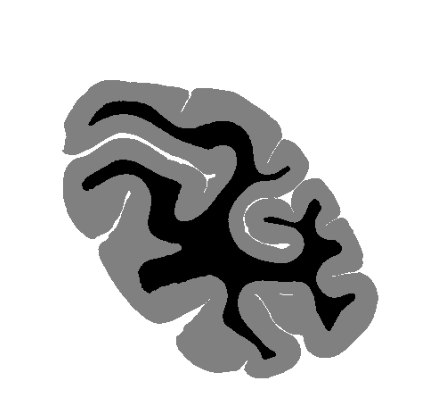

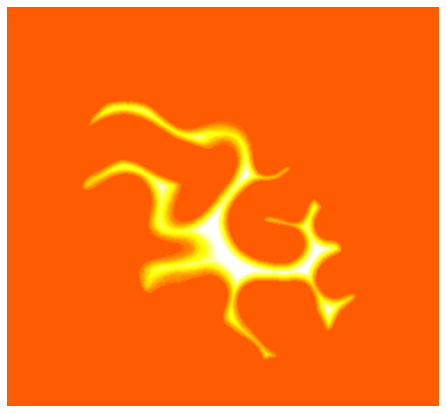

In [2]:
# Load quantity of interest and the cortex segmentation volume

target_file = "data/aa/volume/cortex/wm_depth_6.nii"
cortex_file = "data/aa/volume/cortex/cortex_6.h5"

###

from vervet1818_3d.correlation.functions import load_data
import pli.image as im

target_volume, target_spacing, cortex_volume, cortex_spacing = load_data(
    target_file,
    cortex_file
)

im.show(cortex_volume[:, 50, :])
im.show(target_volume[:, 50, :], scale=False, vmin=-1, vmax=1, cmap='hot')

100%|██████████| 117/117 [01:32<00:00,  1.26it/s]


Scale
Fit
Train & Train:
R² train: 0.748


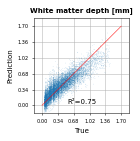

Train & Test:
R² test: -1.1


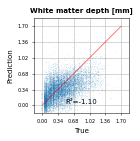

Test & Test:
Scale
Fit
R² tes testt: 0.64


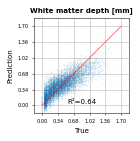

100%|██████████| 234/234 [00:20<00:00, 11.57it/s]


Scale
Fit
Train & Train:
R² train: 0.346


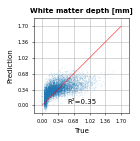

Train & Test:
R² test: 0.233


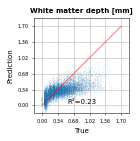

Test & Test:
Scale
Fit
R² tes testt: 0.46


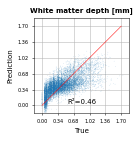

100%|██████████| 137/137 [01:09<00:00,  1.98it/s]


Scale
Fit
Train & Train:
R² train: 0.549


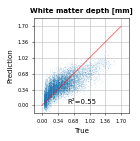

Train & Test:
R² test: 0.249


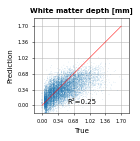

Test & Test:
Scale
Fit
R² tes testt: 0.511


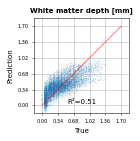

100%|██████████| 117/117 [00:26<00:00,  4.45it/s]


Scale
Fit
Train & Train:
R² train: 0.412


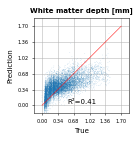

Train & Test:
R² test: 0.163


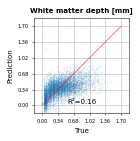

Test & Test:
Scale
Fit
R² tes testt: 0.403


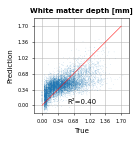

100%|██████████| 117/117 [00:24<00:00,  4.77it/s]


Scale
Fit
Train & Train:
R² train: 0.72


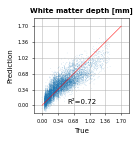

Train & Test:
R² test: 0.286


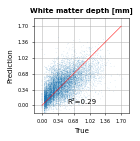

Test & Test:
Scale
Fit
R² tes testt: 0.606


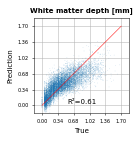

100%|██████████| 117/117 [00:24<00:00,  4.77it/s]


Scale
Fit
Train & Train:
R² train: 0.718


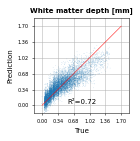

Train & Test:
R² test: 0.186


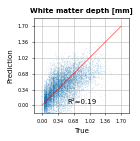

Test & Test:
Scale
Fit
R² tes testt: 0.617


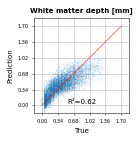

100%|██████████| 117/117 [00:29<00:00,  3.97it/s]


Scale
Fit
Train & Train:
R² train: 0.687


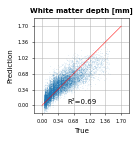

Train & Test:
R² test: 0.312


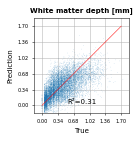

Test & Test:
Scale
Fit
R² tes testt: 0.593


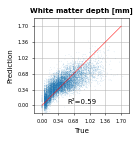

100%|██████████| 117/117 [00:25<00:00,  4.57it/s]


Scale
Fit
Train & Train:
R² train: 0.716


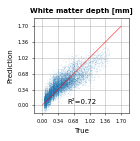

Train & Test:
R² test: 0.364


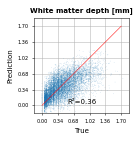

Test & Test:
Scale
Fit
R² tes testt: 0.615


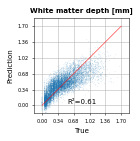

100%|██████████| 117/117 [00:25<00:00,  4.67it/s]


Scale
Fit
Train & Train:
R² train: 0.726


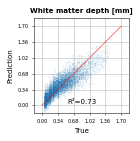

Train & Test:
R² test: 0.32


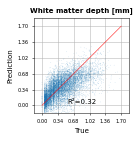

Test & Test:
Scale
Fit
R² tes testt: 0.62


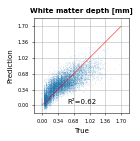

In [3]:
# Load feature maps and setup dictionary of section IDs as keys, starting at zero_section

title = "White matter depth [mm]"
name = "wm_depth"

# Define features
features_path = "data/aa/features/"

models = [
    "simclr-imagenet",
    "pli_glcm",
    "pli_sobel_histo",
    "resnet50_planes8_962-1083_same",
    "resnet50_planes8_962-1083_circle_small",
    "resnet50_planes8_962-1083_circle",
    "resnet50_planes8_962-1083_neighbor",
    "resnet50_planes8_962-1083_sphere_small",
    "resnet50_planes8_962-1083_sphere",
]

feature_groups = [
    "Features/2048",
    "Features/36",
    "Features/252",
    "Features/256",
    "Features/256",
    "Features/256",
    "Features/256",
    "Features/256",
    "Features/256",
]

# Define Train/Test split
zero_section = 841
min_ix = 30
split_ix = 120
max_ix=  210

# Define training data
WM_CLASS = 1

train_count = 10_000
test_count = 10_000

seed = 299_792_458

# Visualization
target_range = (0.0, 1.7)
vis_range = (-0.17, 1.87)

subsample = 10_000

###

from vervet1818_3d.correlation.functions import load_features, aggregate_data, linear_evaluation
import os
import matplotlib.pyplot as plt

# Set the global font size

results = {}

for model, feature_group in zip(models, feature_groups):

    feature_dir = os.path.join(features_path, model)

    feature_maps = load_features(
        feature_dir,
        feature_group,
        zero_section,
        cortex_volume
    )

    test_indices = sorted([f for f in feature_maps.keys() if min_ix <= f < split_ix])
    train_indices = sorted([f for f in feature_maps.keys() if max_ix > f >= split_ix])

    train_features, train_target = aggregate_data(train_indices, train_count, seed, cortex_volume, feature_maps, target_volume, WM_CLASS)
    test_features, test_target = aggregate_data(test_indices, test_count, seed, cortex_volume, feature_maps, target_volume, WM_CLASS)

    r = linear_evaluation(
        train_features,
        train_target,
        test_features,
        test_target,
        target_range,
        vis_range,
        name,
        model,
        title,
        subsample,
    )

    results[model] = r

In [4]:
print("| Method | Train/Train R2\t| Train/Test R2\t| Test/Test R2\t|")
print("| --- | --- | --- | --- |")

for k in results.keys():
    print(f"| {k}\t | {results[k]['train_train_r2']:.3g}\t| {results[k]['train_test_r2']:.3g} | {results[k]['test_test_r2']:.3g} |")

| Method | Train/Train R2	| Train/Test R2	| Test/Test R2	|
| --- | --- | --- | --- |
| simclr-imagenet	 | 0.748	| -1.1 | 0.64 |
| pli_glcm	 | 0.346	| 0.233 | 0.46 |
| pli_sobel_histo	 | 0.549	| 0.249 | 0.511 |
| resnet50_planes8_962-1083_same	 | 0.412	| 0.163 | 0.403 |
| resnet50_planes8_962-1083_circle_small	 | 0.72	| 0.286 | 0.606 |
| resnet50_planes8_962-1083_circle	 | 0.718	| 0.186 | 0.617 |
| resnet50_planes8_962-1083_neighbor	 | 0.687	| 0.312 | 0.593 |
| resnet50_planes8_962-1083_sphere_small	 | 0.716	| 0.364 | 0.615 |
| resnet50_planes8_962-1083_sphere	 | 0.726	| 0.32 | 0.62 |


With clip:

| Method | Train/Train R2	| Train/Test R2	| Test/Test R2	|
| --- | --- | --- | --- |
| simclr-imagenet	 | 0.752	| 0.0577 | 0.643 |
| pli_glcm	 | 0.347	| 0.236 | 0.463 |
| pli_sobel_histo	 | 0.552	| 0.293 | 0.516 |
| resnet50_planes8_962-1083_same	 | 0.415	| 0.187 | 0.405 |
| resnet50_planes8_962-1083_circle_small	 | 0.722	| 0.294 | 0.608 |
| resnet50_planes8_962-1083_circle	 | 0.72	| 0.266 | 0.619 |
| resnet50_planes8_962-1083_neighbor	 | 0.69	| 0.336 | 0.596 |
| resnet50_planes8_962-1083_sphere_small	 | 0.719	| 0.373 | 0.617 |
| resnet50_planes8_962-1083_sphere	 | 0.728	| 0.348 | 0.622 |


Without clip:

| Method | Train/Train R2	| Train/Test R2	| Test/Test R2	|
| --- | --- | --- | --- |
| simclr-imagenet	 | 0.748	| -1.1 | 0.64 |
| pli_glcm	 | 0.346	| 0.233 | 0.46 |
| pli_sobel_histo	 | 0.549	| 0.249 | 0.511 |
| resnet50_planes8_962-1083_same	 | 0.412	| 0.163 | 0.403 |
| resnet50_planes8_962-1083_circle_small	 | 0.72	| 0.286 | 0.606 |
| resnet50_planes8_962-1083_circle	 | 0.718	| 0.186 | 0.617 |
| resnet50_planes8_962-1083_neighbor	 | 0.687	| 0.312 | 0.593 |
| resnet50_planes8_962-1083_sphere_small	 | 0.716	| 0.364 | 0.615 |
| resnet50_planes8_962-1083_sphere	 | 0.726	| 0.32 | 0.62 |
